In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
# Importing data again but with date parsed
df = pd.read_csv("/content/drive/MyDrive/Bulldozer Price Prediction/TrainAndValid.csv",
                low_memory = False,
                parse_dates = ["saledate"])

In [ ]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [ ]:
df.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [ ]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


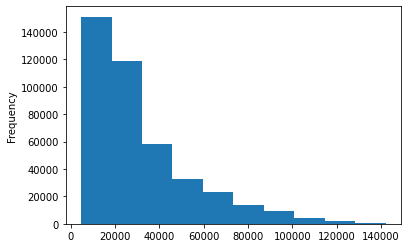

In [ ]:
df["SalePrice"].plot.hist()

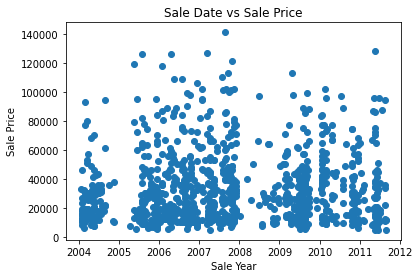

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df.saledate[:1000], df.SalePrice[:1000]);
plt.xlabel("Sale Year");
plt.ylabel("Sale Price");
plt.title("Sale Date vs Sale Price");

In [ ]:
# Sort data by saledate
df.sort_values(by = ["saledate"], inplace= True, ascending = True)
df.saledate.head(20)

205615   1989-01-17
233186   1989-01-31
142491   1989-01-31
115536   1989-01-31
92301    1989-01-31
115892   1989-01-31
134080   1989-01-31
92294    1989-01-31
31494    1989-01-31
140922   1989-01-31
66337    1989-01-31
92531    1989-01-31
82122    1989-01-31
92256    1989-01-31
145670   1989-01-31
92780    1989-01-31
238373   1989-01-31
127132   1989-01-31
115102   1989-01-31
32317    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [ ]:
# Adding datetime parameters for 'saledate' column
df['saleYear'] = df.saledate.dt.year
df['saleMonth'] = df.saledate.dt.month
df['saleDay'] = df.saledate.dt.day
df['saleDayOfWeek'] = df.saledate.dt.dayofweek
df['saleDayOfYear'] = df.saledate.dt.dayofyear

In [ ]:
# Dropping the saledate column
df.drop("saledate", axis = 1, inplace = True)

In [ ]:
df.head().T

,205615,233186,142491,115536,92301
SalesID,1646770,1728883,1508502,1452578,1403418
SalePrice,9500,30000,21000,33000,24000
MachineID,1126363,1523610,1153157,1544443,1390168
ModelID,8434,9105,4138,3854,7110
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1986,1972,1974,1986
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,WA150,D7F,966C,416


## Turn all the string values into categorical values

In [ ]:
# Finding the columns with strings
for label, content in df.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [ ]:
# Turn all string values into categorical values
for label, content in df.items():
  if pd.api.types.is_string_dtype(content):
    df[label] = content.astype("category").cat.as_ordered()

## Filling the missing values

In [ ]:
# Fill the numeric columns with median values
for label, content in df.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      # add a binary column, if the original column was missing
      df[label + "_is_missing"] = pd.isnull(content)
      # fill missing numeric values with median
      df[label] = content.fillna(content.median())

In [ ]:
# Turn categorical variables into numbers

for label, content in df.items():
  if not pd.api.types.is_numeric_dtype(content):
    df[label + "_is_missing"] = pd.isnull(content)
    df[label] = pd.Categorical(content).codes + 1

In [ ]:
df.isnull().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

## Modelling the data

In [ ]:
# Split the data into training and validation set
df_val = df[df.saleYear == 2012]
df_train = df[df.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [ ]:
# Split the data into x and y
df_train_xtrain = df_train.drop("SalePrice", axis = 1)
df_train_ytrain = df_train["SalePrice"]

df_val_xtrain = df_val.drop("SalePrice", axis = 1)
df_val_ytrain = df_val["SalePrice"]

df_train_xtrain.shape, df_train_ytrain.shape, df_val_xtrain.shape, df_val_ytrain.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Building the evaluation function

In [ ]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(ytest, ypred):
  """
  Calculates root mean squared log error between predicted and actual value
  """

  return np.sqrt(mean_squared_log_error(ytest, ypred))

# Create function to evaluate model to a few different parameters
def show_scores(model):
  train_preds = model.predict(df_train_xtrain)
  val_preds = model.predict(df_val_xtrain)

  scores = {
      "Training MAE" : mean_absolute_error(df_train_ytrain, train_preds),
      "Valid MAE" : mean_absolute_error(df_val_ytrain, val_preds),
      "Training RMSLE" : rmsle(df_train_ytrain, train_preds),
      "Valid RMSLE" : rmsle(df_val_ytrain, val_preds),
      "Training R^2" : r2_score(df_train_ytrain, train_preds),
      "Valid R^2" : r2_score(df_val_ytrain, val_preds)
  }

  return scores

### Random Forest Regressor

In [ ]:
# Testing our model on a subset

%%time
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs = -1,
                              random_state = 22,
                              max_samples = 10000)

CPU times: user 151 µs, sys: 0 ns, total: 151 µs
Wall time: 159 µs


In [ ]:
%%time
model.fit(df_train_xtrain, df_train_ytrain)

CPU times: user 55.5 s, sys: 581 ms, total: 56.1 s
Wall time: 30.1 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=10000, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=22, verbose=0, warm_start=False)

In [ ]:
show_scores(model)

{'Training MAE': 5563.996432608288,
 'Training RMSLE': 0.2578246143214639,
 'Training R^2': 0.8605518439976871,
 'Valid MAE': 7190.465061781733,
 'Valid RMSLE': 0.29415314473578635,
 'Valid R^2': 0.8311867537277982}

In [ ]:
%%time

# Hyperparameter tuning with Randomized search CV
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {
    "n_estimators" : np.arange(10, 100, 10),
    "max_depth" : [None, 3, 5, 10],
    "min_samples_split" : np.arange(2, 20, 2),
    "min_samples_leaf" : np.arange(1, 20, 2),
    "max_features" : [0.5, 1, "sqrt", "auto"],
    "max_samples" : [10000]
}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs= -1,
                                                    random_state = 22),
                              param_distributions = rf_grid,
                              n_iter = 100,
                              cv = 5,
                              verbose = True)

rs_model.fit(df_train_xtrain, df_train_ytrain)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 47.1min finished


CPU times: user 22min 52s, sys: 55.3 s, total: 23min 48s
Wall time: 47min 13s


In [ ]:
# Find the best model hyperparameters
rs_model.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'max_samples': 10000,
 'min_samples_leaf': 7,
 'min_samples_split': 4,
 'n_estimators': 20}

In [ ]:
# Evaluate the model
show_scores(rs_model)

{'Training MAE': 6025.194166599246,
 'Training RMSLE': 0.27382705546825375,
 'Training R^2': 0.8349148211998914,
 'Valid MAE': 7587.669475513135,
 'Valid RMSLE': 0.3045185171696474,
 'Valid R^2': 0.8062654796854178}

In [ ]:
%%time
# If we increase the n_iter, we will find better hyperparameters
# Train the models with the best hyperparameters

ideal_model = RandomForestRegressor(n_estimators = 40,
                                   min_samples_leaf = 1,
                                   min_samples_split = 14,
                                   max_features=0.5,
                                   n_jobs = -1,
                                   max_samples=None,
                                   random_state = 22)

ideal_model.fit(df_train_xtrain, df_train_ytrain)

CPU times: user 4min 51s, sys: 253 ms, total: 4min 51s
Wall time: 2min 30s


In [ ]:
show_scores(ideal_model)

{'Training MAE': 2953.0385694578135,
 'Training RMSLE': 0.14447423239513543,
 'Training R^2': 0.9589518621135927,
 'Valid MAE': 5959.775578442485,
 'Valid RMSLE': 0.2457856399234902,
 'Valid R^2': 0.8809832201728538}

In [ ]:
import joblib
joblib.dump(rs_model, "rs_model.pkl")
joblib.dump(ideal_model, "ideal_model.pkl")

['ideal_model.pkl']